In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout

import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('E:/FakeNewsCorpus_Sample_1M.csv')

In [3]:
X = df['text']
y = df['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [5]:
# Tokenizing text
vocab = 20000
tokenizer = Tokenizer(num_words= vocab)
tokenizer.fit_on_texts(X_train)

# Text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
sent_len = 128
#percentile_95 = np.percentile(sequence_lengths, 95)
#percentile_95 = int(percentile_95)

#sent_len = percentile_95

X_train_padded = pad_sequences(X_train_sequences, maxlen=sent_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=sent_len)

In [6]:
model = Sequential()
model.add(Embedding(vocab, 128))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True) Bug me val_loss

# Compile
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              183200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 2,743,401
Trainable params: 2,743,401
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Train the model
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=4, batch_size=124)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_padded, y_train)
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/4
6452/6452 [==============================] - 986s 152ms/step - loss: 0.1272 - accuracy: 0.9490 - val_loss: 0.1011 - val_accuracy: 0.9588
Epoch 2/4
6452/6452 [==============================] - 985s 153ms/step - loss: 0.0829 - accuracy: 0.9668 - val_loss: 0.0953 - val_accuracy: 0.9597
Epoch 3/4
6452/6452 [==============================] - 973s 151ms/step - loss: 0.0654 - accuracy: 0.9742 - val_loss: 0.0916 - val_accuracy: 0.9650
Epoch 4/4
6250/6250 [==============================] - 128s 20ms/step - loss: 0.1012 - accuracy: 0.9644
Train Loss: 0.03164498880505562
Train Accuracy: 0.9891387224197388
Test Loss: 0.10116344690322876
Test Accuracy: 0.9644250273704529


[0.1271878033876419, 0.08287108689546585, 0.06542743742465973, 0.04985286295413971]
[0.10114886611700058, 0.09533415734767914, 0.09161179512739182, 0.10116351395845413]
[0.9489824771881104, 0.9668262600898743, 0.9741849899291992, 0.980593740940094]
[0.9588149785995483, 0.9597300291061401, 0.9650099873542786, 0.9644250273704529]


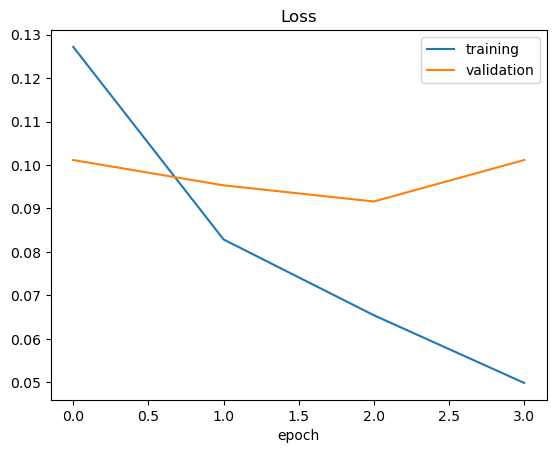

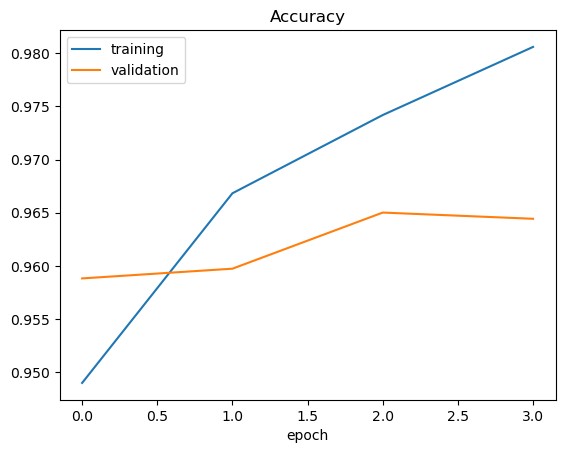

In [8]:
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')


plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [14]:
prd_df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/LIAR_preprocessed_nolemma.csv')

In [17]:
val_text = prd_df['text']
val_label = prd_df['Label']

In [18]:
val_text_sequences = tokenizer.texts_to_sequences(val_text)

val_text_padded = pad_sequences(val_text_sequences, maxlen=sent_len)

In [19]:
test2_loss, test2_accuracy = model.evaluate(val_text_padded, val_label)

250/250 [==============================] - 5s 20ms/step - loss: 1.7218 - accuracy: 0.4767


In [20]:
pred = model.predict(val_text_padded)

250/250 [==============================] - 6s 20ms/step


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [22]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.47672229890826956
Precision on testing set: 0.8305808656036446
Recall on testing set: 0.4493222427603204


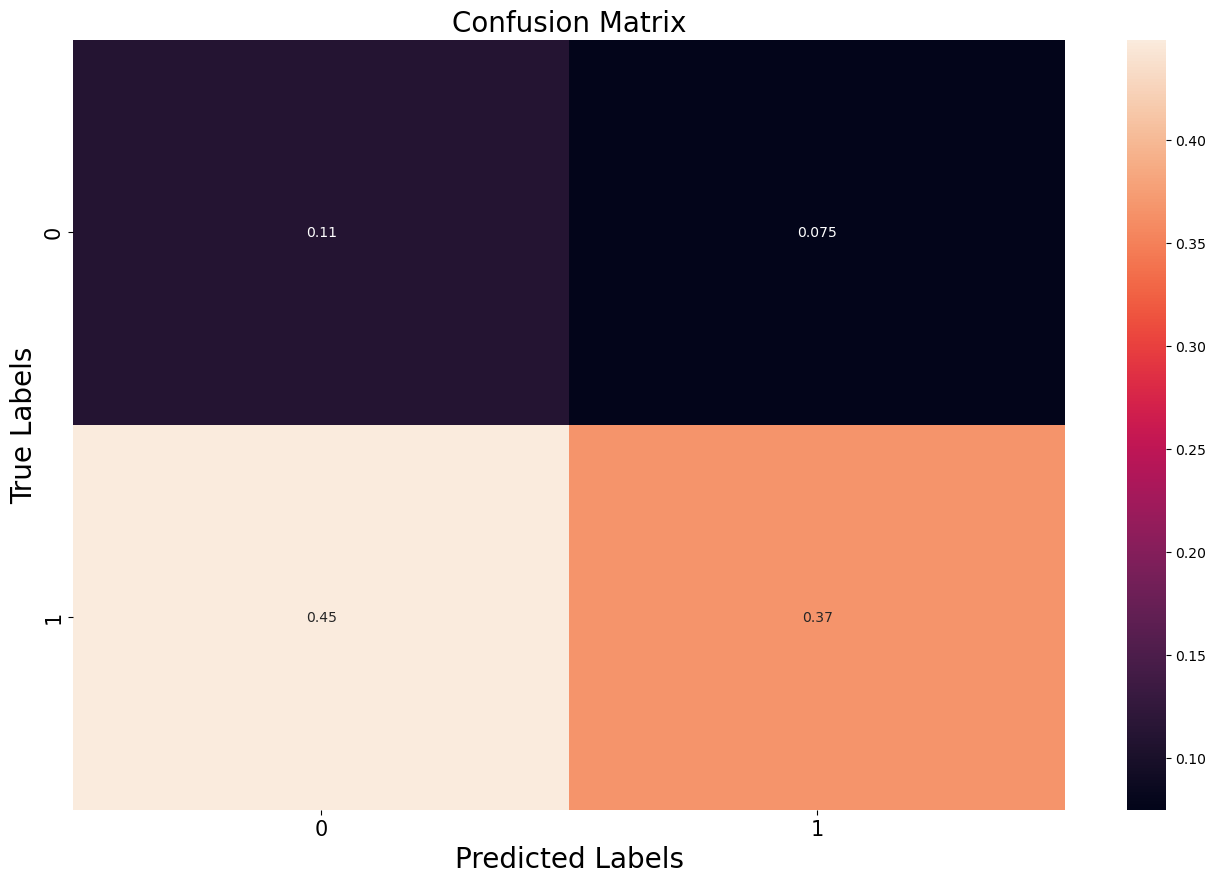

In [23]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [24]:
print("Classification Report on LIAR set\n")
print(classification_report(binary_predictions, val_label))

Classification Report on LIAR set

              precision    recall  f1-score   support

           0       0.20      0.60      0.30      1477
           1       0.83      0.45      0.58      6492

    accuracy                           0.48      7969
   macro avg       0.51      0.52      0.44      7969
weighted avg       0.71      0.48      0.53      7969



6250/6250 [==============================] - 131s 21ms/step
Accuracy on testing set: 0.964425
Precision on testing set: 0.9566453762843654
Recall on testing set: 0.9640450444399669
Classification Report on Training set

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    110666
           1       0.96      0.96      0.96     89334

    accuracy                           0.96    200000
   macro avg       0.96      0.96      0.96    200000
weighted avg       0.96      0.96      0.96    200000



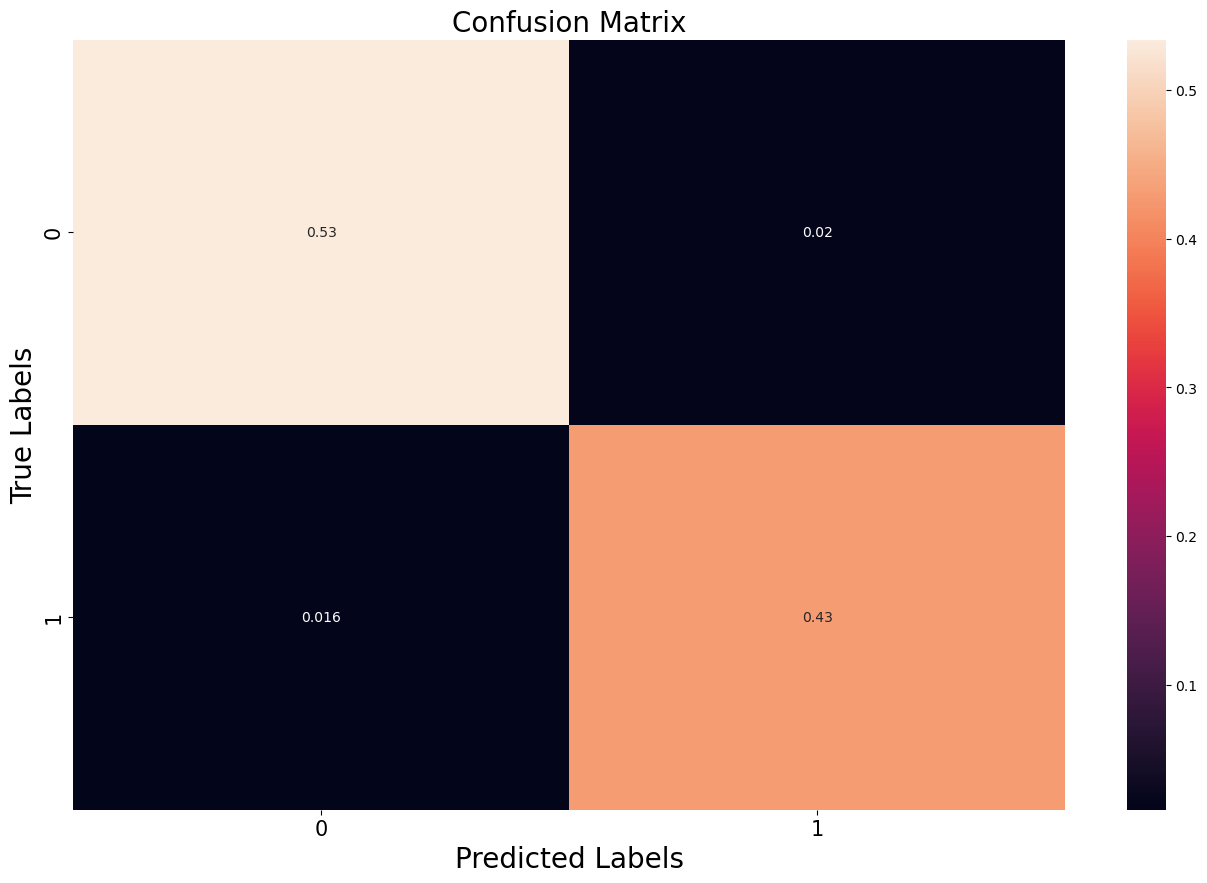

In [25]:
pred = model.predict(X_test_padded)

binary_predictions_Train = []

for i in pred:
    if i >= 0.5:
        binary_predictions_Train.append(1)
    else:
        binary_predictions_Train.append(0) 
        
matrix = confusion_matrix(binary_predictions_Train, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_Train, y_test))
print('Precision on testing set:', precision_score(binary_predictions_Train, y_test))
print('Recall on testing set:', recall_score(binary_predictions_Train, y_test))

print("Classification Report on Training set\n")
print(classification_report(binary_predictions_Train, y_test))

2255/2255 [==============================] - 98s 43ms/step
Accuracy on testing set: 0.7696509274405967
Precision on testing set: 0.6545841642860993
Recall on testing set: 0.8647465109655369
Classification Report on WELFake set

              precision    recall  f1-score   support

           0       0.89      0.71      0.79     44046
           1       0.65      0.86      0.75     28088

    accuracy                           0.77     72134
   macro avg       0.77      0.79      0.77     72134
weighted avg       0.80      0.77      0.77     72134



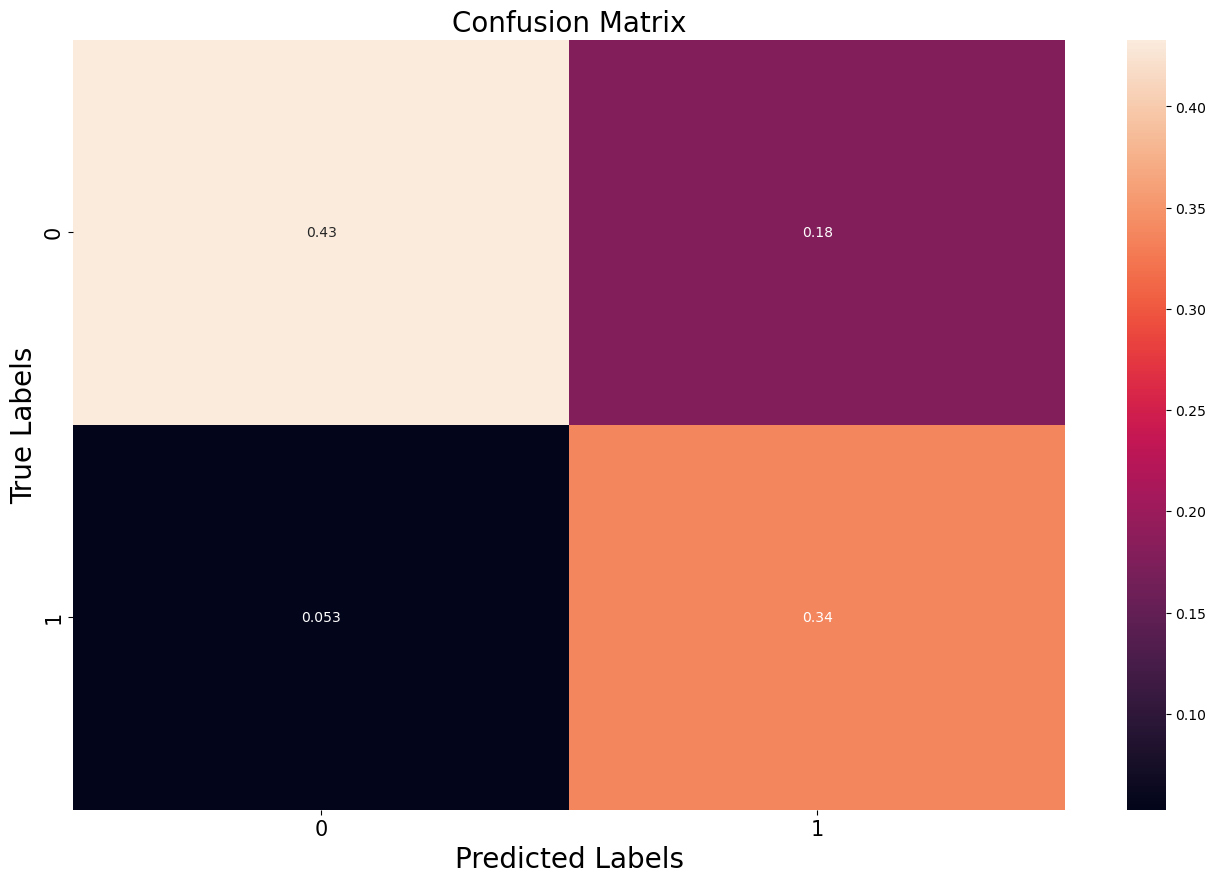

In [27]:
liar_df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/WELFake_Dataset.csv')
liar_df.text = liar_df.text.astype(str)

liar_text = liar_df['text']
liar_label = liar_df['label']

liar_text_sequences = tokenizer.texts_to_sequences(liar_text)

liar_text_padded = pad_sequences(liar_text_sequences, maxlen=256)

pred_liar = model.predict(liar_text_padded)

binary_predictions_liar = []

for i in pred_liar:
    if i >= 0.5:
        binary_predictions_liar.append(1)
    else:
        binary_predictions_liar.append(0) 
        
matrix = confusion_matrix(binary_predictions_liar, liar_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_liar, liar_label))
print('Precision on testing set:', precision_score(binary_predictions_liar, liar_label))
print('Recall on testing set:', recall_score(binary_predictions_liar, liar_label))

print("Classification Report on WELFake set\n")
print(classification_report(binary_predictions_liar, liar_label))

In [12]:
import joblib

filename = "LSTM_Corpus_model.joblib"
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://3e2e5db9-8369-4a81-b0df-d79e082a31e8/assets


INFO:tensorflow:Assets written to: ram://3e2e5db9-8369-4a81-b0df-d79e082a31e8/assets


['LSTM_Corpus_model.joblib']